# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### The UCI Bank Marketing dataset represents 17 direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. These campaigns resulted in 79,354 contacts, with an overall success rate of approximately 8%, meaning around 6,499 clients subscribed to a term deposit.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
# confirming that there are no nulls in the data
null_records = df.isna().sum().reset_index()
null_records.columns = ['Column Name', 'Null Values']

print(null_records)

       Column Name  Null Values
0              age            0
1              job            0
2          marital            0
3        education            0
4          default            0
5          housing            0
6             loan            0
7          contact            0
8            month            0
9      day_of_week            0
10        duration            0
11        campaign            0
12           pdays            0
13        previous            0
14        poutcome            0
15    emp.var.rate            0
16  cons.price.idx            0
17   cons.conf.idx            0
18       euribor3m            0
19     nr.employed            0
20               y            0


In [15]:
# Ientifying non-numerical data [object] and creating a temp table with that info
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a list of DataFrames to concatenate
frames_to_concat = []

for col in categorical_columns:
    unique_counts_df = pd.DataFrame({
        'Column Name': [col],
        'Unique Value Counts': [df[col].nunique()]
    })
    frames_to_concat.append(unique_counts_df)

# Concatenate the DataFrames in the list
categorial_table_info = pd.concat(frames_to_concat, ignore_index=True)

print(categorial_table_info)

    Column Name  Unique Value Counts
0           job                   12
1       marital                    4
2     education                    8
3       default                    3
4       housing                    3
5          loan                    3
6       contact                    2
7         month                   10
8   day_of_week                    5
9      poutcome                    3
10            y                    2


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

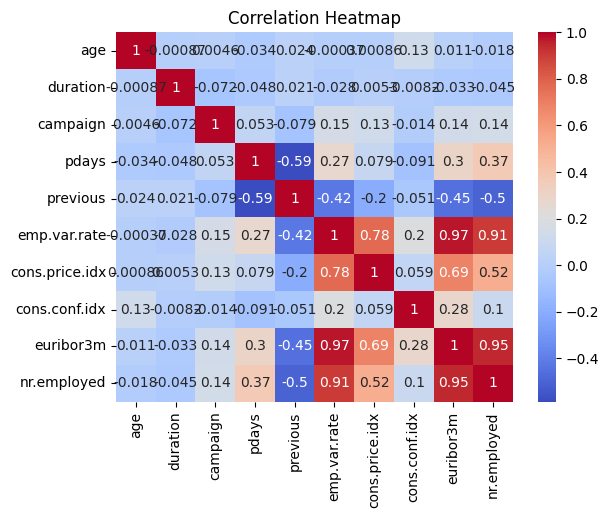

In [19]:
# identifying numerical data and correlation among them
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### emp.var.rate, euribor3m, nr.employed are highly correlated.
### there are 10 Categorial and 10 Numerical features
### 3 categorial features are Binary : 'default', 'housing' , 'loan'
### y is the target outcome

In [20]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Text(0.5, 1.1, 'Box plot of numerical variables')

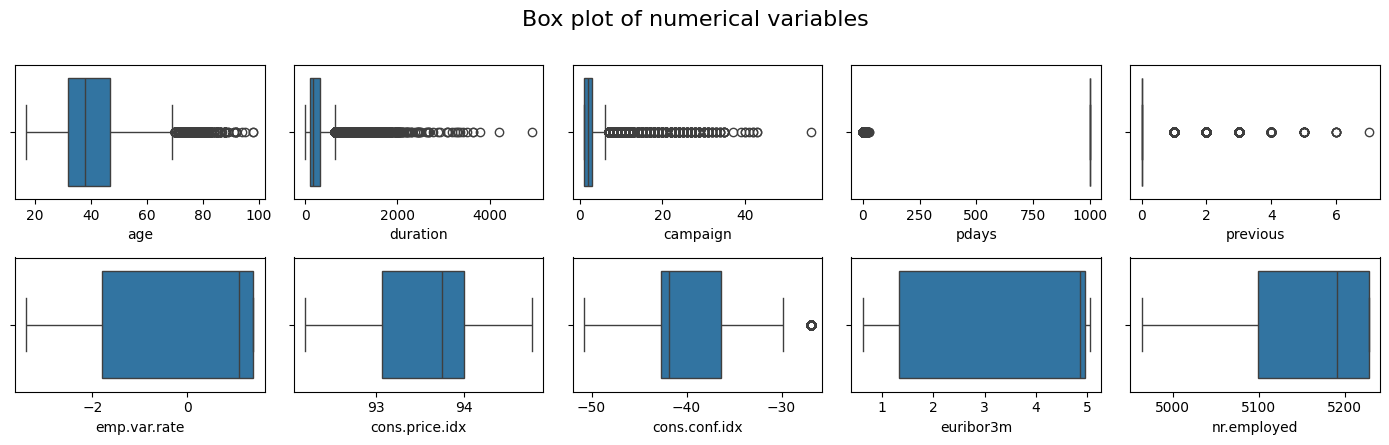

In [21]:
# Box plots of the Numerical features to examine the distribution of the features
numerical_columns = []
for icol in df.columns:
    if df[icol].dtypes in ['float64', 'int64']:
        numerical_columns.append(icol)
print(numerical_columns)

fig, axs = plt.subplots(nrows = 2, ncols=5, figsize = (14,4))
for name,ax in zip(numerical_columns,axs.flatten()):
    sns.boxplot(data=df,x=name,ax=ax)
  # plt.show()
fig.tight_layout()
fig.suptitle('Box plot of numerical variables',y=1.1,fontsize=16)

In [ ]:
# 'age', 'duration', 'campaign', 'pdays' and 'previous' are not well distributed.

Text(0.5, 1.05, 'Distribution Plot of Numerical Features')

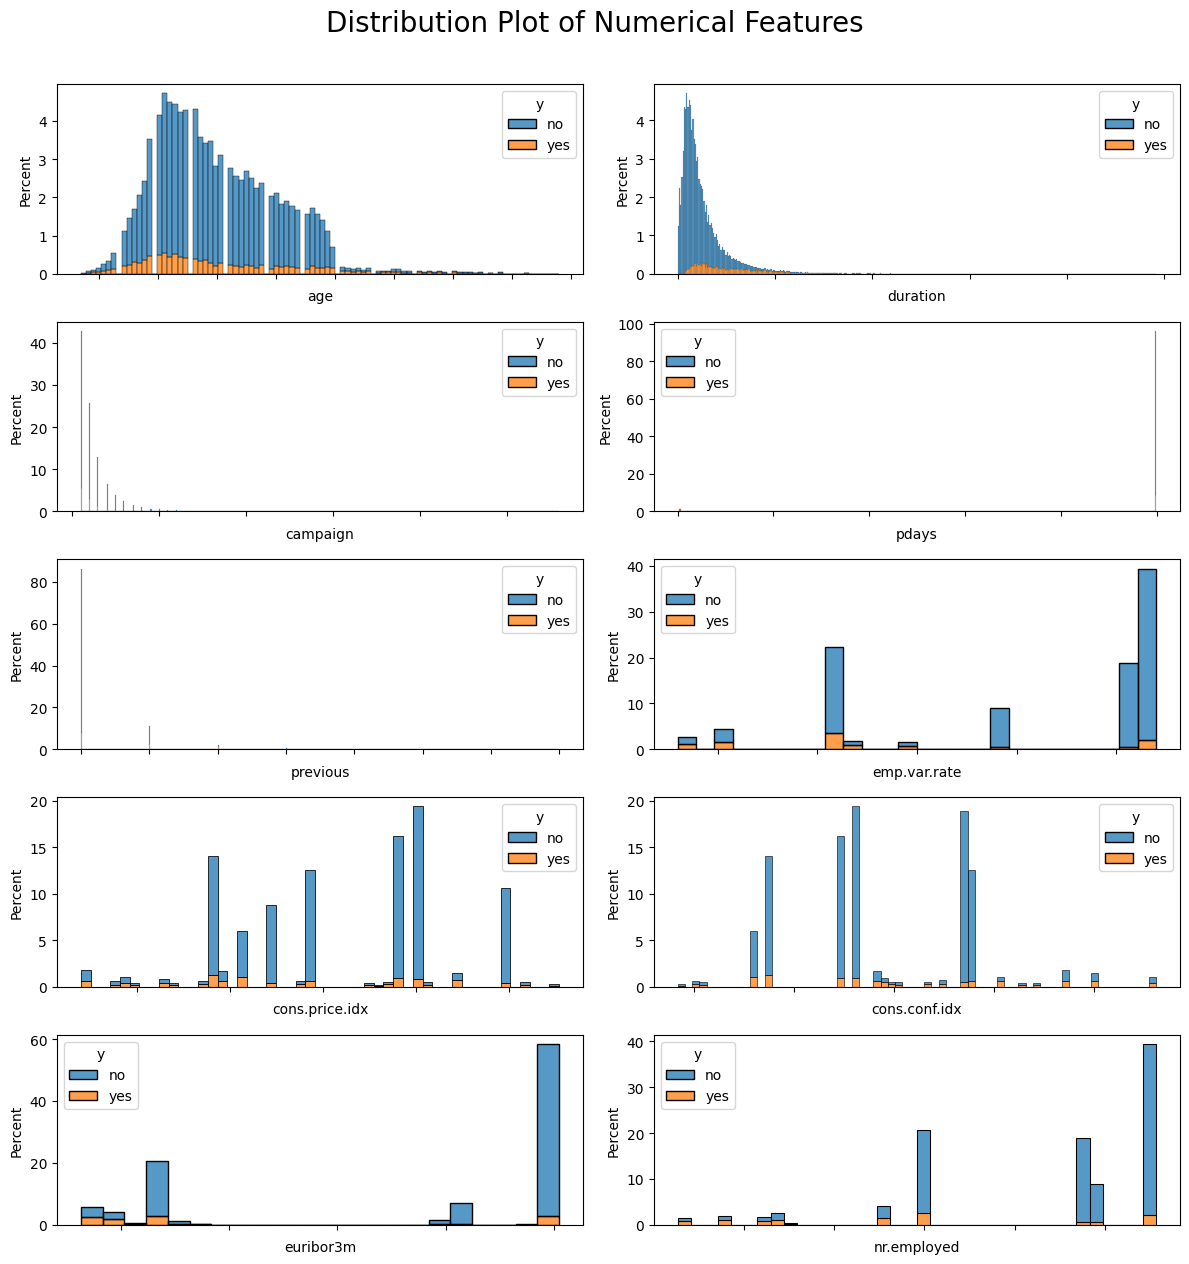

In [23]:
# Distribution Plot of the Numerical features 
fig, axs = plt.subplots(nrows = 5, ncols=2, figsize = (12,12))
for name,ax in zip(numerical_columns,axs.flatten()):
    sns.histplot(data=df,x=name,ax=ax,hue='y',multiple='stack',stat='percent')
    ax.set_xticklabels(ax.get_xticklabels(minor=True,which='minor'),rotation=0,fontsize=50)

fig.tight_layout()
fig.suptitle('Distribution Plot of Numerical Features',y=1.05,fontsize=20)

### this is not giving us any valuable information, distributions are skewed and need to be scaled.

In [ ]:
# we will have to look at pairplot distribution to get true correlation

Text(0.5, 1.0, 'Pairplot of the numerical features')

<Figure size 1000x1000 with 0 Axes>

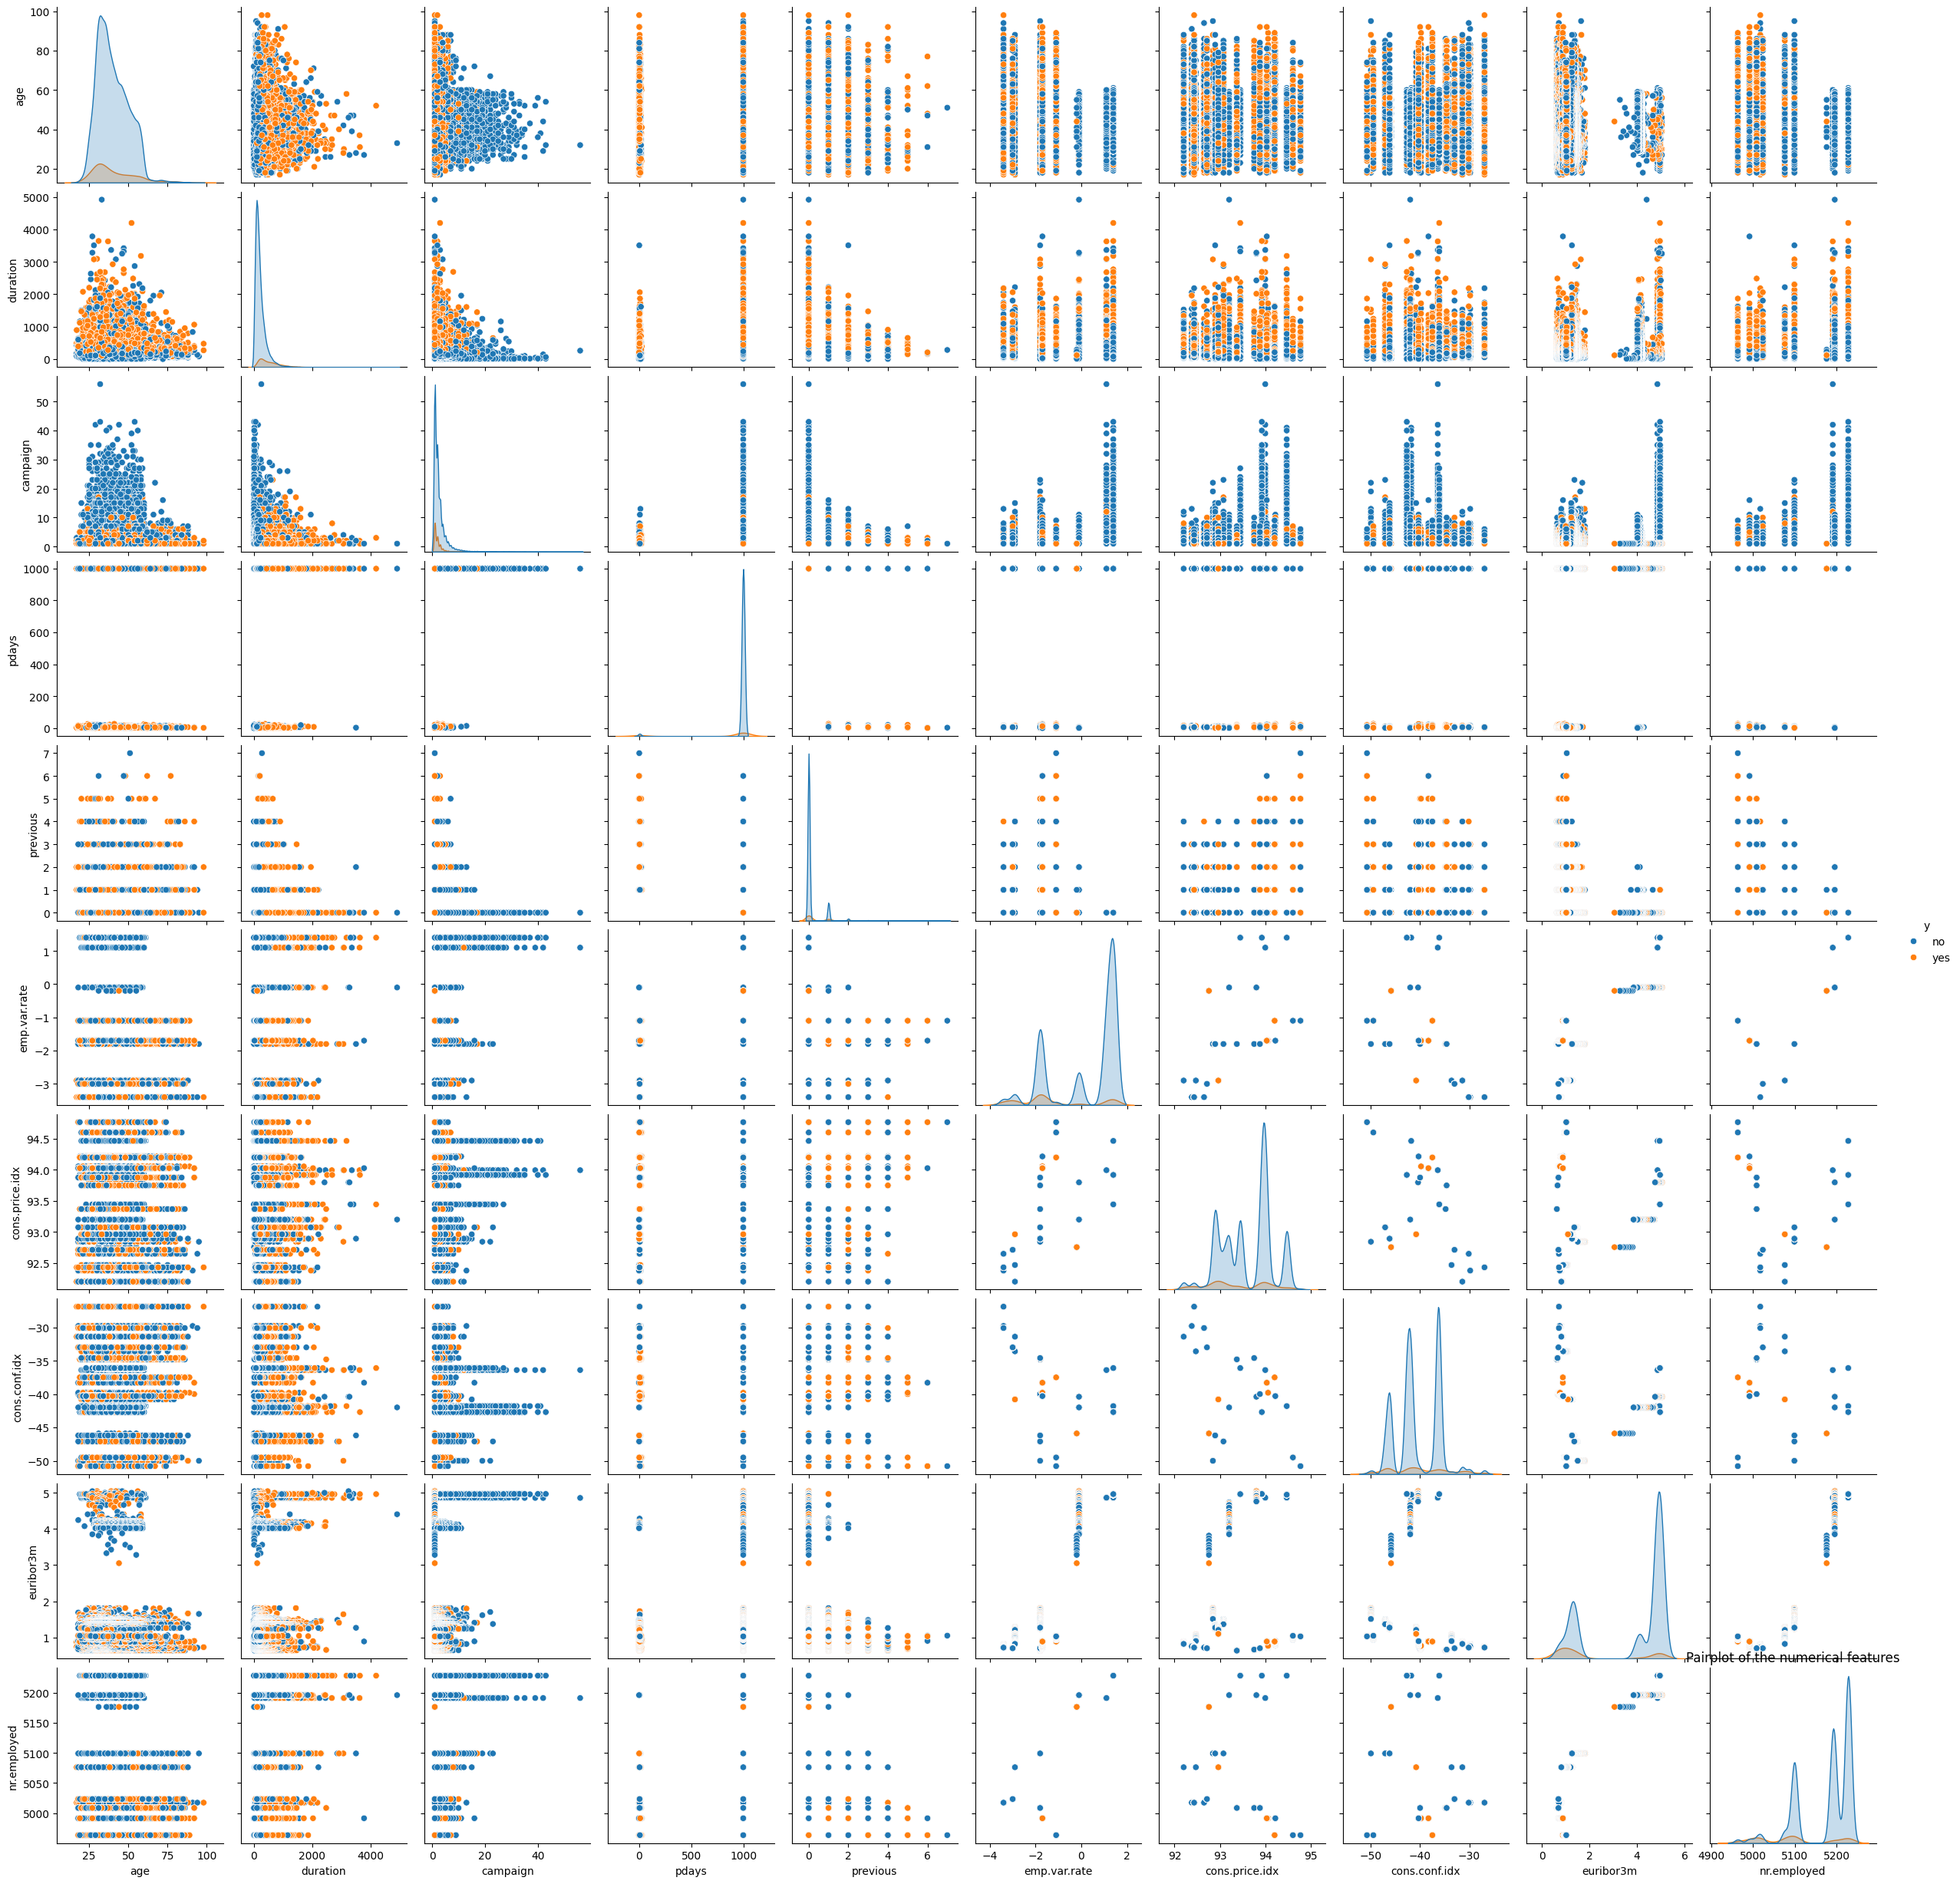

In [24]:
plt.figure(figsize=(10, 10))
sns.pairplot(data=df, hue = 'y')
plt.title('Pairplot of the numerical features')

#### Missing Values - No missing values were found in any of the features.

#### Data Types Review - 
##### Numeric (int64 or float64): age, duration, campaign, pdays, previous
##### Economic indicators: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
##### Categorical (object): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

#### Action:
##### Categorical variables will need encoding (e.g., one-hot or label encoding) for machine learning.
##### Target variable y is categorical (binary: "yes"/"no") and needs to be converted to 0/1.

#### Correlation Analysis
##### Strong correlations to check for multicollinearity:
##### euribor3m, nr.employed, and emp.var.rate are typically highly correlated and could cause issues with some models (like linear regression or logistic regression).

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.



### The business objective of this task is to maximize the effectiveness of a bank’s direct marketing campaigns by accurately identifying which clients are most likely to subscribe to a term deposit product.

### By analyzing historical marketing data—including customer demographics, contact details, and campaign outcomes - the bank aims to:
#### 1. Improve targeting by focusing marketing efforts on clients with a higher likelihood of positive response.
#### 2. Optimize resource allocation by reducing the number of ineffective calls.
#### 3. Increase subscription rates to term deposits, ultimately improving overall return on marketing investment.

### In summary, the objective is to develop a predictive model that helps the bank make data-driven decisions to increase the success rate of future campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Preprocessing
##### Convert categorical variables to numeric via encoding.
##### Transform target variable y to binary numeric (1 = "yes", 0 = "no").
##### Consider dropping or combining highly correlated features (like emp.var.rate, euribor3m, nr.employed)
##### Scale numerical features (especially for models sensitive to scale like SVM, KNN, or Neural Nets).

In [42]:
# select bank related features 
bank_features = [
    'age', 'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'day_of_week'
]
df_bank = df[bank_features + ['y']].copy()

In [43]:
# Encode the Target Variable
# Convert target y to binary:
# Encode target safely
df_bank['y'] = df_bank['y'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0}).astype(int)

In [44]:
# data was not clean so had to do do lot of steps 
# copy() - to avoid chained assignment issues.
# loc[:, 'y'] safely updates the column in-place.
# .astype(str).str.strip().str.lower() ensures formatting issues like " Yes " or "NO" are handled.
# .map(...).astype(int) gives a clean binary label.

In [45]:
# Encode Categorical Features (One-Hot Encoding)
# convert string categories into numeric format that ML models can interpret.
df_encoded = pd.get_dummies(df_bank, 
                            columns=[col for col in df_bank.columns if df_bank[col].dtype == 'object' and col != 'y'], 
                            drop_first=True)

In [46]:
# Separate Features and Target
# Now split the dataset into X = input features and y = output variable (target)

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [48]:
# Split the data into training and test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [49]:
# This gives the accuracy of a dummy classifier that always predicts "no".
# This is your minimum performance benchmark.
baseline_accuracy = y.value_counts(normalize=True).max()
print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")

Baseline Accuracy (majority class): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [50]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

print(f"Training Time: {end_time - start_time:.4f} seconds")

Training Time: 0.0548 seconds


### Problem 9: Score the Model

What is the accuracy of your model?

In [52]:
from sklearn.metrics import accuracy_score
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.8870
Test Accuracy: 0.8880


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [54]:
# Compare Logistic Regression, Decision Tree, and SVM models using default settings.

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC()
}

import pandas as pd

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Train Time (s)': round(end - start, 4),
        'Train Accuracy': round(accuracy_score(y_train, train_pred), 4),
        'Test Accuracy': round(accuracy_score(y_test, test_pred), 4)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression          0.0457          0.8870         0.8880
1        Decision Tree          0.1093          0.9774         0.8320
2                  SVM         28.2015          0.8933         0.8881


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
    # To answer the following questions the Logistic Regression model was select since it has obtained the high test accuracy. Altough Decision Tree model had higher train accuracy, it seems that can cause overfitting. I will focus in optmizing the hyperparamenters of the logistic regression.


#### Our dataset does not contain gender, but if it did:
    # Should we keep it? -> Only if it's predictive and ethically justified.
    # -> Check correlation with the target. If it doesn't help or risks bias, remove it.

#### Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.

In [55]:
# Hyperparameter Tuning — Example: Decision Tree

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", round(grid_search.best_score_, 4))

Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best F1 Score (CV): 0.2439


In [57]:
# Adjusting the Performance Metric
from sklearn.metrics import classification_report, confusion_matrix

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6624  686]
 [ 698  230]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7310
           1       0.25      0.25      0.25       928

    accuracy                           0.83      8238
   macro avg       0.58      0.58      0.58      8238
weighted avg       0.83      0.83      0.83      8238



### Conclusion
#### In this study, we set out to predict whether a client would subscribe to a term deposit based on bank marketing data.
    #Our goal was to build a predictive model that improves the efficiency and effectiveness of direct marketing campaigns by identifying clients most likely to respond positively.We began by understanding the business objective and preparing the data for modeling.
    # This involved cleaning and encoding categorical features, especially transforming the target variable y into binary form. We handled missing values, applied one-hot encoding, and scaled numerical values where necessary.
    # To evaluate our models meaningfully, we first established a baseline using the majority class accuracy (approximately 88.7%). We then built and assessed a Logistic Regression model, which gave us a test accuracy above the baseline—indicating that our model was learning useful patterns from the data.
    # We expanded our analysis by comparing additional models, including Decision Tree and Support Vector Machine (SVM), using default settings. We recorded and analyzed training times, train/test accuracy, and model behavior. This allowed us to evaluate the trade-offs between model complexity, performance, and computation time.

### Finally, we explored ways to improve our models through:
    # Feature engineering (e.g., handling low-impact or biased features),
    # Hyperparameter tuning using grid search (e.g., optimizing max_depth in decision trees),
    # And refining performance metrics (e.g., shifting from accuracy to F1-score due to class imbalance).

### Final Thoughts
    # This project demonstrated the full pipeline of a classification problem:From data preparation and baseline evaluation, To modeling, comparison, and refinement.
#### Future improvements could include:
    # Using ensemble models (Random Forest),
    # Reducing dimensionality to support memory-heavy models like KNN
#### By making data-driven decisions, the bank can now better target its campaigns, reduce cost, and improve the likelihood of customer conversion.

##### Questions